In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches

In [26]:
fin = '..\\Great_Lakes_Ice\\GIS\\GL230315_lam\\GL230315_lam.shp'
dt = pd.to_datetime('230315', format='%y%m%d')
dtstr = dt.strftime('%Y %b %d')
ice_proj = gpd.read_file(fin)

#Stripping first values
ice_proj['SA'] = ice_proj['SA'].str[1:].astype(int)
ice_proj

,ICECODE,CT,CA,CB,CC,SA,SB,SC,SO,SD,FA,FB,FC,FP,FS,POLY_TYPE,Shape_Leng,Shape_Area,geometry
0,CT00CA0000-9CB0000-9CC0000-9CF-9-9CN00CD00,00,00,00,00,0,00,00,00,00,-9,-9,-9,-9,-9,W,4.573953e+06,8.798919e+10,"POLYGON ((1888027.128 841965.354, 1887519.127 ..."
1,CT00CA0000-9CB0000-9CC0000-9CF-9-9CN00CD00,00,00,00,00,0,00,00,00,00,-9,-9,-9,-9,-9,W,7.114032e+05,7.536324e+09,"POLYGON ((1495295.908 850266.364, 1497412.579 ..."
2,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,4.242849e+04,4.404267e+07,"POLYGON ((1317293.700 744803.397, 1318087.451 ..."
3,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,5.416510e+04,6.461575e+07,"POLYGON ((1319727.871 763271.351, 1321685.792 ..."
4,CT20CA-98199CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,20,-9,-9,-9,1,-9,-9,-9,-9,99,-9,-9,-9,-9,I,5.592836e+04,5.889202e+07,"POLYGON ((1578765.502 765708.669, 1581781.758 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,4.815348e+04,1.154246e+08,"POLYGON ((1047007.298 769745.170, 1046556.789 ..."
135,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,2.885838e+04,2.106182e+07,"POLYGON ((1032755.023 844425.165, 1031745.368 ..."
136,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,9.111246e+04,1.409969e+08,"POLYGON ((1155816.804 883308.877, 1156372.430 ..."
137,CT92CA508705CB508508CC-9-9-9CF-9-9CN-9CD-9,92,50,50,-9,7,85,-9,-9,-9,05,08,-9,-9,-9,I,2.986005e+04,5.415554e+07,"POLYGON ((1188523.677 904873.236, 1188069.020 ..."


In [27]:
# read in manual surveying data
manual = pd.read_excel("C:\\Users\\saibh\\miniconda3\\envs\\geo_ds\\Great_Lakes_Ice\\WinterGrab metadata.xlsx")
gdf = gpd.GeoDataFrame(manual, geometry=[Point(xy) for xy in zip(manual['Long  (decimal degree; DDD.DDDDD°)'], manual['Lat (decimal degree; DDD.DDDDD°)'])])
gdf

C:\Users\saibh\miniconda3\envs\geo_ds\lib\site-packages\shapely\io.py:106: RuntimeWarning: invalid value encountered in to_wkt
  return lib.to_wkt(
C:\Users\saibh\miniconda3\envs\geo_ds\lib\site-packages\shapely\io.py:106: RuntimeWarning: invalid value encountered in to_wkt
  return lib.to_wkt(


,PI name,Site name,Lake,Sampling date (dd-mm-yyyy),Start time (00:00),End time (00:00),Lat (decimal degree; DDD.DDDDD°),Long (decimal degree; DDD.DDDDD°),Water depth (m),Site photos taken? (y/n),Weather narrative,geometry
0,W. Currie,CCIW,Hamilton Harbour,16-02-2022,09:45:00,10:50:00,43.297092,-79.801564,8.00,y,"overcast, windy",POINT (-79.80156 43.29709)
1,W. Currie,Bronte,Ontario,22-02-2022,11:02:00,12:00:00,43.392831,-79.705792,4.00,y,"over cast, east wind and 1m waves",POINT (-79.70579 43.39283)
2,Rennie,Silver Harbour,Superior,19-02-2022,10:57:00,13:00:00,48.508184,-88.972586,10.50,y,"sunny, clear, very windy and cold",POINT (-88.97259 48.50818)
3,Eveleth,Lorain,Erie,15-02-2022,11:41:00,15:30:00,41.472778,-82.175000,3.00,y,"sunny, clear, air temp -5C, winds 5mph from NE",POINT (-82.17500 41.47278)
4,Doubek,Saint Martin Bay (SM-LH),Lake Huron,17-02-2022,09:00:00,11:20:00,46.013070,-84.641270,9.70,y,overcast; windy: 10-15 mph from the North; air...,POINT (-84.64127 46.01307)
5,Doubek,Whitefish Bay (WB-LS),Lake Superior,22-02-2022,10:10:00,13:15:00,46.454450,-84.830200,9.90,y,overcast; wind: 10 mph from North; air tempera...,POINT (-84.83020 46.45445)
6,Uzarski,Pinconning,Lake Huron,15-02-2022,15:26:00,16:51:00,43.849810,-83.916600,1.68,y,"cloudy, breezy, 25 degrees C",POINT (-83.91660 43.84981)
7,Uzarski,Vanderbilt,Lake Huron,15-02-2022,10:18:00,12:15:00,43.610180,-83.661450,2.40,y,"sunny, calm, 18 degrees C",POINT (-83.66145 43.61018)
8,Uzarski,Eagle Bay Marine,Lake Huron,22-02-2022,10:31:00,11:50:00,43.952390,-83.877490,0.83,y,"rainy & windy, 31 degrees C",POINT (-83.87749 43.95239)
9,Ozersky,Green Bay,Lake Michigan,14-02-2022,09:20:00,12:20:00,44.639835,-87.801237,5.50,y,sunny & no wind,POINT (-87.80124 44.63983)


In [36]:
# create a list of our conditions
conditions = [
    (ice_proj['SA'] == 1),
    (ice_proj['SA'] == 4),
    (ice_proj['SA'] == 5),
    (ice_proj['SA'] == 6),
    (ice_proj['SA'] == 7)
    ]

# create a list of the values we want to assign for each condition
values = ['0 - 10 centimetres', '10 - 15 centimetres', '15 - 30 centimetres', '> 30 centimetres', '30 - 70 centimetres']

# create a new column and use np.select to assign values to it using our lists as arguments
ice_proj['Ice thickness'] = np.select(conditions, values)
# ice = ice_proj.to_crs('+proj=longlat +ellps=WGS84')
obs_gdf.set_crs(ice_proj.crs, inplace=True)


,PI name,Site name,Lake,Sampling date (dd-mm-yyyy),Start time (00:00),End time (00:00),Lat (decimal degree; DDD.DDDDD°),Long (decimal degree; DDD.DDDDD°),Water depth (m),Site photos taken? (y/n),Weather narrative,geometry
0,W. Currie,CCIW,Hamilton Harbour,16-02-2022,9:45,10:50,43.297092,-79.801564,8.00,y,"overcast, windy",POINT (-79.802 43.297)
1,W. Currie,Bronte,Ontario,22-02-2022,11:02,12:00,43.392831,-79.705792,4.00,y,"over cast, east wind and 1m waves",POINT (-79.706 43.393)
2,Rennie,Silver Harbour,Superior,19-02-2022,10:57,13:00,48.508184,-88.972586,10.50,y,"sunny, clear, very windy and cold",POINT (-88.973 48.508)
3,Eveleth,Lorain,Erie,15-02-2022,11:41,15:30,41.472778,-82.175000,3.00,y,"sunny, clear, air temp -5C, winds 5mph from NE",POINT (-82.175 41.473)
4,Doubek,Saint Martin Bay (SM-LH),Lake Huron,17-02-2022,9:00,11:20,46.013070,-84.641270,9.70,y,overcast; windy: 10-15 mph from the North; air...,POINT (-84.641 46.013)
5,Doubek,Whitefish Bay (WB-LS),Lake Superior,22-02-2022,10:10,13:15,46.454450,-84.830200,9.90,y,overcast; wind: 10 mph from North; air tempera...,POINT (-84.830 46.454)
6,Uzarski,Pinconning,Lake Huron,15-02-2022,3:26 PM,4:51 PM,43.849810,-83.916600,1.68,y,"cloudy, breezy, 25 degrees C",POINT (-83.917 43.850)
7,Uzarski,Vanderbilt,Lake Huron,15-02-2022,10:18,12:15,43.610180,-83.661450,2.40,y,"sunny, calm, 18 degrees C",POINT (-83.661 43.610)
8,Uzarski,Eagle Bay Marine,Lake Huron,22-02-2022,10:31,11:50,43.952390,-83.877490,0.83,y,"rainy & windy, 31 degrees C",POINT (-83.877 43.952)
9,Ozersky,Green Bay,Lake Michigan,14-02-2022,9:20,12:20,44.639835,-87.801237,5.50,y,sunny & no wind,POINT (-87.801 44.640)


In [37]:
ice_proj.crs

<Projected CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: WGS_1984_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
obs_gdf.crs

<Projected CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: WGS_1984_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\saibh\AppData\Local\Temp\ipykernel_11140\4261354126.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  obs_gdf.plot(column='Water depth (m)', ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)


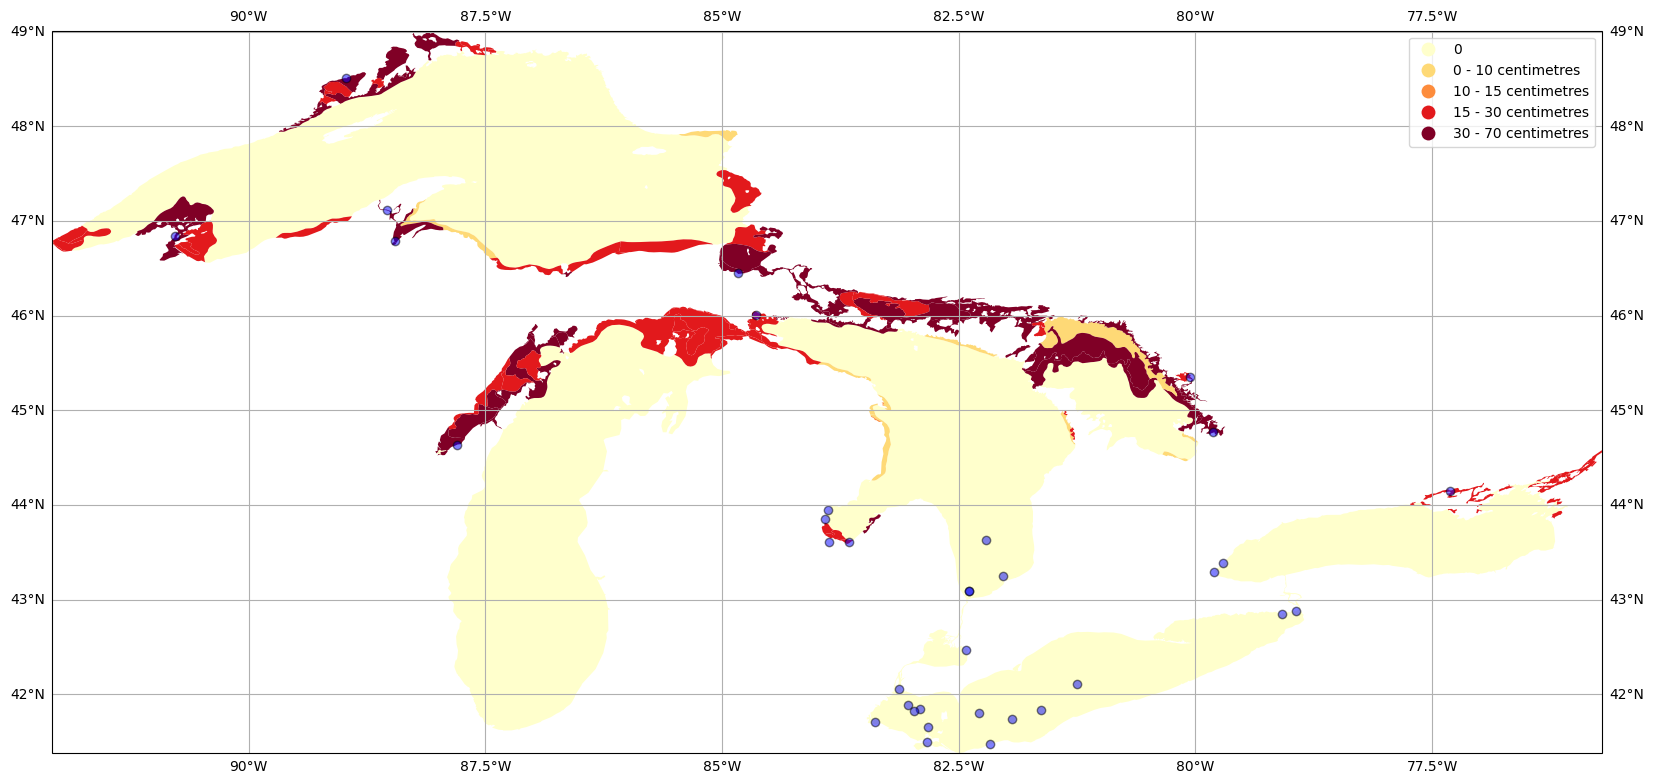

In [57]:
# Experimentin

data_crs = ccrs.PlateCarree()

# Create a Cartopy map 
fig, ax = plt.subplots(1, 1, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Assuming ice_proj is another GeoDataFrame representing ice projections.
ice_proj.plot(column='Ice thickness', ax=ax, legend=True, cmap='YlOrRd', transform=data_crs)

# Plot geodataframe
obs_gdf.plot(column='Water depth (m)', ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)

# Set the extent based on ice_proj data
minx, miny, maxx, maxy = ice_proj.total_bounds 
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Set the aspect of the map
ax.set_aspect('equal')

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()



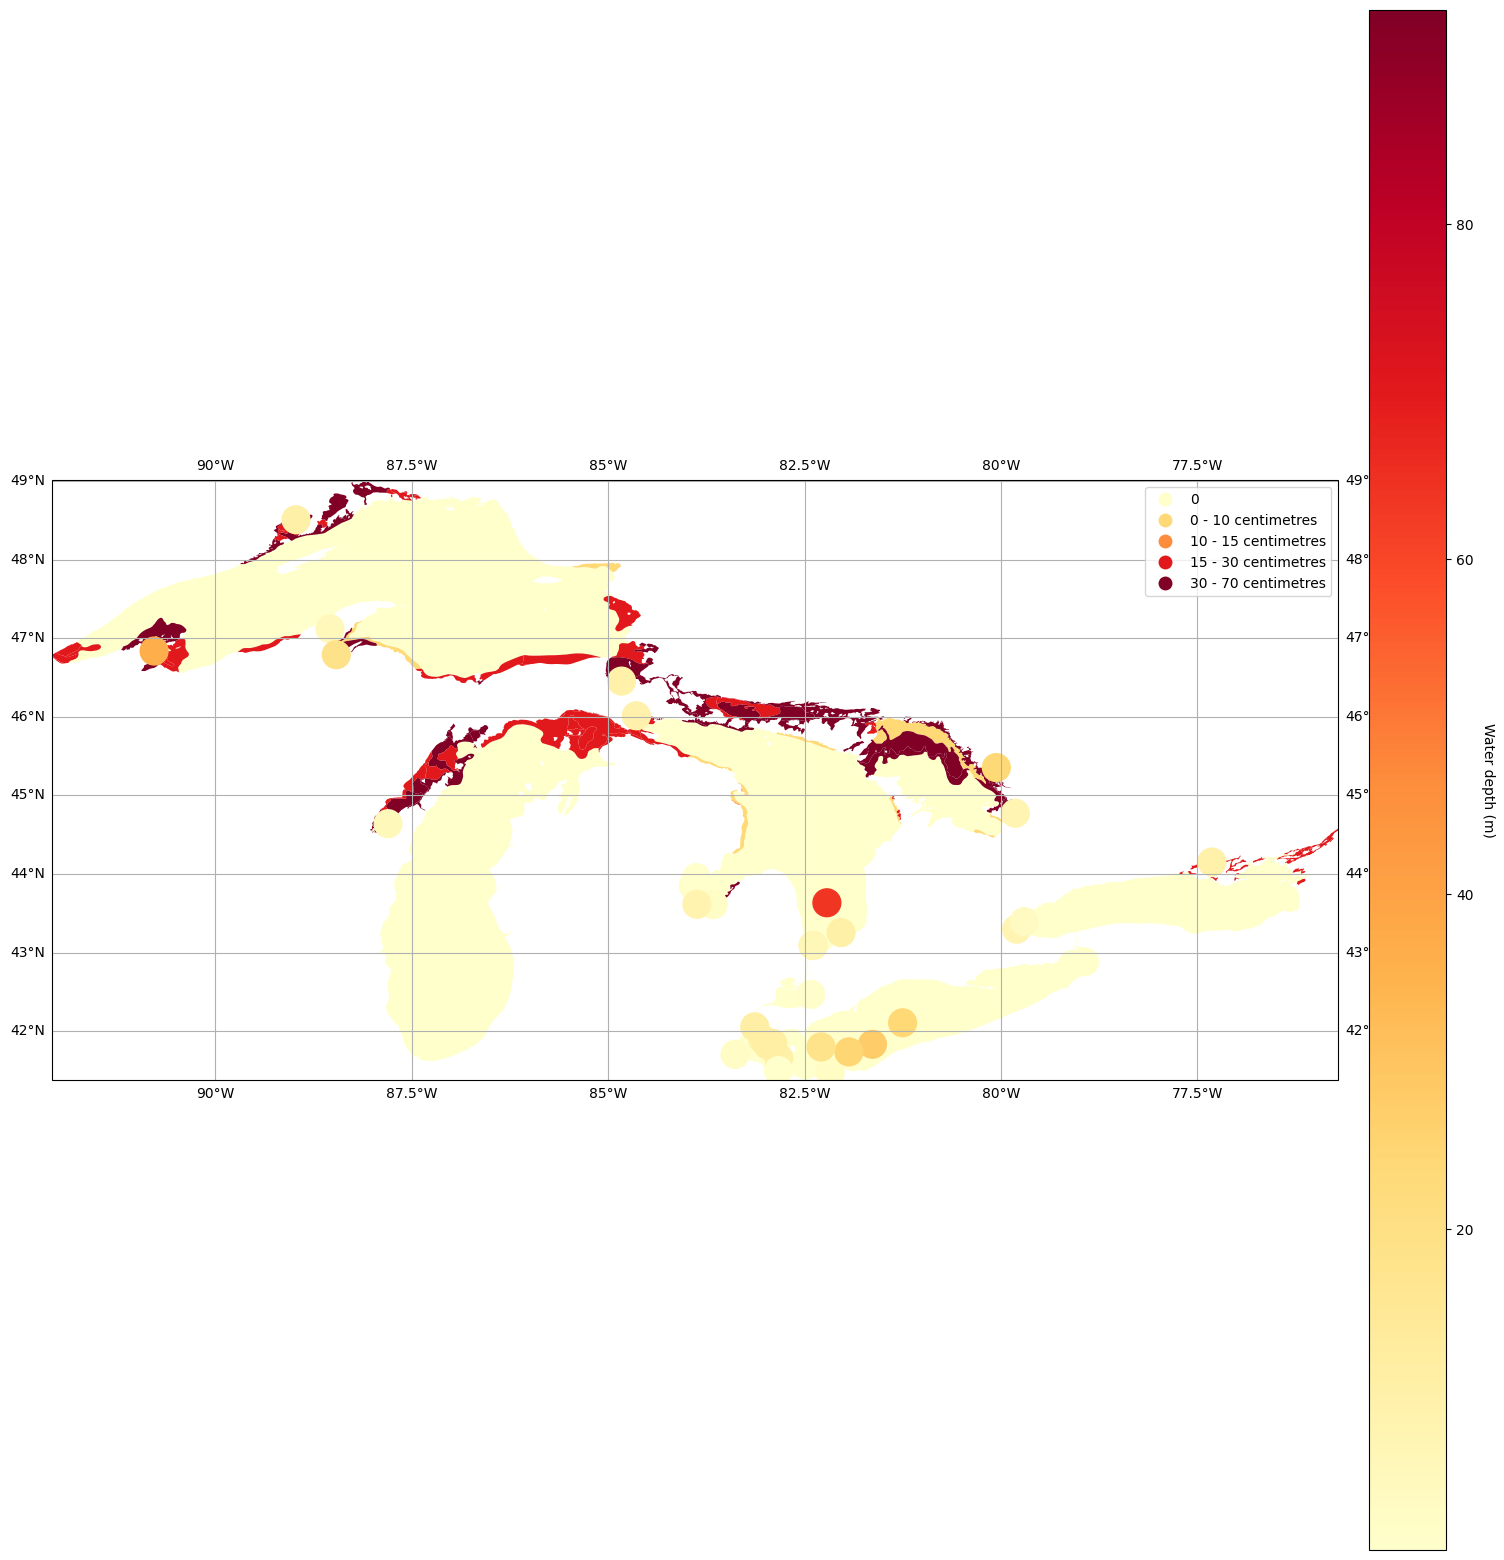

In [56]:
data_crs = ccrs.PlateCarree()

# Create a Cartopy map 
fig, ax = plt.subplots(1, 1, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Assuming ice_proj is another GeoDataFrame representing ice projections.
ice_proj.plot(column='Ice thickness', ax=ax, legend=True, cmap='YlOrRd', transform=data_crs)

# Plot geodataframe
obs_gdf.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', transform=data_crs)

# Scatter plot on the centroids of the geometries
cmap = plt.get_cmap('YlOrRd')
gdf_centroid = obs_gdf.geometry.centroid
scatter = ax.scatter(gdf_centroid.x, gdf_centroid.y, c=obs_gdf['Water depth (m)'], cmap=cmap, s=400, transform=ccrs.PlateCarree())
# ax.scatter(gdf_centroid.x, gdf_centroid.y, s=400, color='black', transform=data_crs)

# Create a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Water depth (m)', rotation=270, labelpad=15)

# Set the extent based on ice_proj data
minx, miny, maxx, maxy = ice_proj.total_bounds 
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

# Set the aspect of the map
ax.set_aspect('equal')

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()

plt.show()

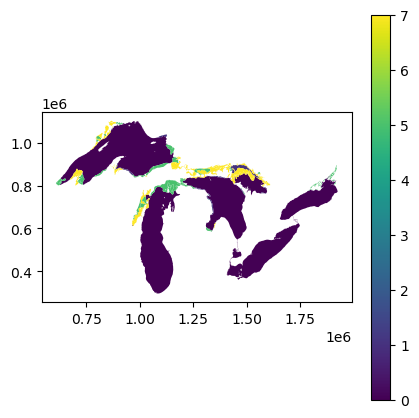

In [51]:
ice['CT'] = ice['CT'].astype(float)
ice.loc[ice['CT'] == 91, 'CT'] = 95
ice.loc[ice['CT'] == 92, 'CT'] = 100
#plt.figure(figsize=(12, 12))
#plt.plot(ice['CT'])
#plt.title(dtstr)


fig,ax = plt.subplots(figsize = (5, 5)) 
ice_proj.plot(ax=ax,column='SA',legend=True)

plt.show()

#plt.savefig(fout)
#plt.close()